In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda x, pos: f'{x:.0f}k')
# formatter = FuncFormatter(lambda x, pos: f'{x:.0e}k')

sns.set(style="whitegrid")

plt.rcParams["font.family"] = "Times New Roman"


In [2]:
df_bns_2_node1 = pd.read_csv('bns_2_node1_partition.csv', header=None)
df_bns_2_node2 = pd.read_csv('bns_2_node2_partition.csv', header=None)

df_rcgnn_2_node1 = pd.read_csv('rcgnn_2_node3_partition.csv', header=None)
df_rcgnn_2_node2 = pd.read_csv('rcgnn_2_node4_partition.csv', header=None)

df_bns_4_node1 = pd.read_csv('bns_4_node1_partition.csv', header=None)
df_bns_4_node2 = pd.read_csv('bns_4_node2_partition.csv', header=None)
df_bns_4_node3 = pd.read_csv('bns_4_node3_partition.csv', header=None)
df_bns_4_node4 = pd.read_csv('bns_4_node4_partition.csv', header=None)

df_rcgnn_4_node1 = pd.read_csv('rcgnn_4_node1_partition.csv', header=None)
df_rcgnn_4_node2 = pd.read_csv('rcgnn_4_node2_partition.csv', header=None)
df_rcgnn_4_node3 = pd.read_csv('rcgnn_4_node3_partition.csv', header=None)
df_rcgnn_4_node4 = pd.read_csv('rcgnn_4_node4_partition.csv', header=None)

df_bns_2 = pd.concat([df_bns_2_node1, df_bns_2_node2], axis=0)
df_rcgnn_2 = pd.concat([df_rcgnn_2_node1, df_rcgnn_2_node2], axis=0)

df_bns_4 = pd.concat([df_bns_4_node1, df_bns_4_node2, df_bns_4_node3, df_bns_4_node4], axis=0)
df_rcgnn_4 = pd.concat([df_rcgnn_4_node1, df_rcgnn_4_node2, df_rcgnn_4_node3, df_rcgnn_4_node4], axis=0)

df_bns_2.columns = ['for_commute', 'meth', 'rank', 'raw_data', 'dataset', 'partition', 'gpus']
df_rcgnn_2.columns = ['for_commute', 'meth', 'rank', 'raw_data', 'dataset', 'partition', 'gpus']

df_bns_4.columns = ['for_commute', 'meth', 'rank', 'raw_data', 'dataset', 'partition', 'gpus']
df_rcgnn_4.columns = ['for_commute', 'meth', 'rank', 'raw_data', 'dataset', 'partition', 'gpus']


yelp-16-metis-cut-trans
yelp-16-metis-cut-trans-8-8


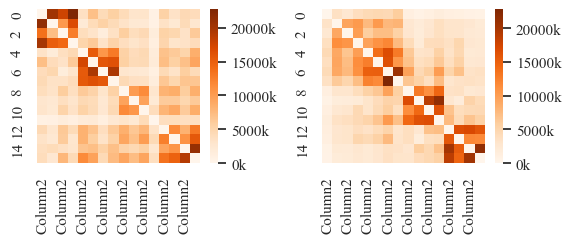

In [3]:
dataset = "yelp"
gpus = 8
nodes = 2

bns_name = dataset + '-' + str(gpus*nodes) + '-metis-cut-trans'
rcgnn_name = dataset + '-' + str(gpus*nodes) + '-metis-cut-trans' + ((f'-{gpus}') * nodes)

print(bns_name)
print(rcgnn_name)

df_bns_plot = df_bns_2[df_bns_2['dataset'] == bns_name]
# 按照rank升序
df_bns_plot = df_bns_plot.sort_values(by='rank', ascending=True)

# 创建一个新的空DataFrame来存储拆分后的数据
df_bns_expanded = pd.DataFrame()

# 遍历df_bns_plot中的每一行
for index, row in df_bns_plot.iterrows():
    # 获取raw_data列的内容
    raw_data_content = row['raw_data']
    # print(row['rank'])
    raw_data_content = raw_data_content + '(' + str(row['rank']) + ' 0)'
    # 使用正则表达式分割raw_data_content中的每一对数字
    parts = re.findall(r'\((\d+)\s(\d+)\)', raw_data_content)
    # 对 parts 按照第一个元素的值排序
    parts_sorted = sorted(parts, key=lambda x: int(x[0]))
    # 在第index的位置插入0
    df_parts_sorted = pd.DataFrame([pd.to_numeric(x[1]) for x in parts_sorted], columns=['Column2'])
    df_bns_expanded = pd.concat([df_bns_expanded, df_parts_sorted], axis=1)

# print(df_bns_expanded)

df_rcgnn_plot = df_rcgnn_2[df_rcgnn_2['dataset'] == rcgnn_name]
# 按照rank升序
df_rcgnn_plot = df_rcgnn_plot.sort_values(by='rank', ascending=True)

# print(df_rcgnn_plot)

# 创建一个新的空DataFrame来存储拆分后的数据
df_rcgnn_expanded = pd.DataFrame()

# 遍历df_rcgnn_plot中的每一行
for index, row in df_rcgnn_plot.iterrows():
    # 获取raw_data列的内容
    raw_data_content = row['raw_data']
    # print(row['rank'])
    raw_data_content = raw_data_content + '(' + str(row['rank']) + ' 0)'
    # 使用正则表达式分割raw_data_content中的每一对数字
    parts = re.findall(r'\((\d+)\s(\d+)\)', raw_data_content)
    # 对 parts 按照第一个元素的值排序
    parts_sorted = sorted(parts, key=lambda x: int(x[0]))
    # 在第index的位置插入0
    df_parts_sorted = pd.DataFrame([pd.to_numeric(x[1]) for x in parts_sorted], columns=['Column2'])
    df_rcgnn_expanded = pd.concat([df_rcgnn_expanded, df_parts_sorted], axis=1)

# print(df_rcgnn_expanded)

plt.figure(figsize=(6.3, 2), dpi=100)
plt.subplots_adjust(wspace=0.4, hspace=0)

plt.subplot(1, 2, 1)

sns.heatmap(df_bns_expanded, cmap='Oranges', cbar_kws={'format': formatter})

plt.subplot(1, 2, 2)

sns.heatmap(df_rcgnn_expanded, cmap='Oranges', cbar_kws={'format': formatter})

plt.show()


ogbn-arxiv-32-metis-cut-trans
ogbn-arxiv-32-metis-cut-trans-8-8-8-8


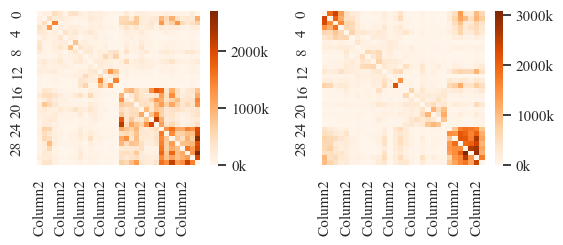

In [4]:
dataset = "ogbn-arxiv"
gpus = 8
nodes = 4

bns_name = dataset + '-' + str(gpus*nodes) + '-metis-cut-trans'
rcgnn_name = dataset + '-' + str(gpus*nodes) + '-metis-cut-trans' + ((f'-{gpus}') * nodes)

print(bns_name)
print(rcgnn_name)

df_bns_plot = df_bns_4[df_bns_4['dataset'] == bns_name]
# 按照rank升序
df_bns_plot = df_bns_plot.sort_values(by='rank', ascending=True)

# 创建一个新的空DataFrame来存储拆分后的数据
df_bns_expanded = pd.DataFrame()

# 遍历df_bns_plot中的每一行
for index, row in df_bns_plot.iterrows():
    # 获取raw_data列的内容
    raw_data_content = row['raw_data']
    # print(row['rank'])
    raw_data_content = raw_data_content + '(' + str(row['rank']) + ' 0)'
    # 使用正则表达式分割raw_data_content中的每一对数字
    parts = re.findall(r'\((\d+)\s(\d+)\)', raw_data_content)
    # 对 parts 按照第一个元素的值排序
    parts_sorted = sorted(parts, key=lambda x: int(x[0]))
    # 在第index的位置插入0
    df_parts_sorted = pd.DataFrame([pd.to_numeric(x[1]) for x in parts_sorted], columns=['Column2'])
    df_bns_expanded = pd.concat([df_bns_expanded, df_parts_sorted], axis=1)

# print(df_bns_expanded)

df_rcgnn_plot = df_rcgnn_4[df_rcgnn_4['dataset'] == rcgnn_name]
# 按照rank升序
df_rcgnn_plot = df_rcgnn_plot.sort_values(by='rank', ascending=True)

# print(df_rcgnn_plot)

# 创建一个新的空DataFrame来存储拆分后的数据
df_rcgnn_expanded = pd.DataFrame()

# 遍历df_rcgnn_plot中的每一行
for index, row in df_rcgnn_plot.iterrows():
    # 获取raw_data列的内容
    raw_data_content = row['raw_data']
    # print(row['rank'])
    raw_data_content = raw_data_content + '(' + str(row['rank']) + ' 0)'
    # 使用正则表达式分割raw_data_content中的每一对数字
    parts = re.findall(r'\((\d+)\s(\d+)\)', raw_data_content)
    # 对 parts 按照第一个元素的值排序
    parts_sorted = sorted(parts, key=lambda x: int(x[0]))
    # 在第index的位置插入0
    df_parts_sorted = pd.DataFrame([pd.to_numeric(x[1]) for x in parts_sorted], columns=['Column2'])
    df_rcgnn_expanded = pd.concat([df_rcgnn_expanded, df_parts_sorted], axis=1)

# print(df_rcgnn_expanded)

plt.figure(figsize=(6.3, 2), dpi=100)
plt.subplots_adjust(wspace=0.4, hspace=0)

plt.subplot(1, 2, 1)

sns.heatmap(df_bns_expanded, cmap='Oranges', cbar_kws={'format': formatter})

plt.subplot(1, 2, 2)

sns.heatmap(df_rcgnn_expanded, cmap='Oranges', cbar_kws={'format': formatter})

plt.show()


ogbn-proteins-16-metis-cut-trans
ogbn-proteins-16-metis-cut-trans-8-8
reddit-16-metis-cut-trans
reddit-16-metis-cut-trans-8-8
ogbn-products-16-metis-cut-trans
ogbn-products-16-metis-cut-trans-8-8
yelp-16-metis-cut-trans
yelp-16-metis-cut-trans-8-8


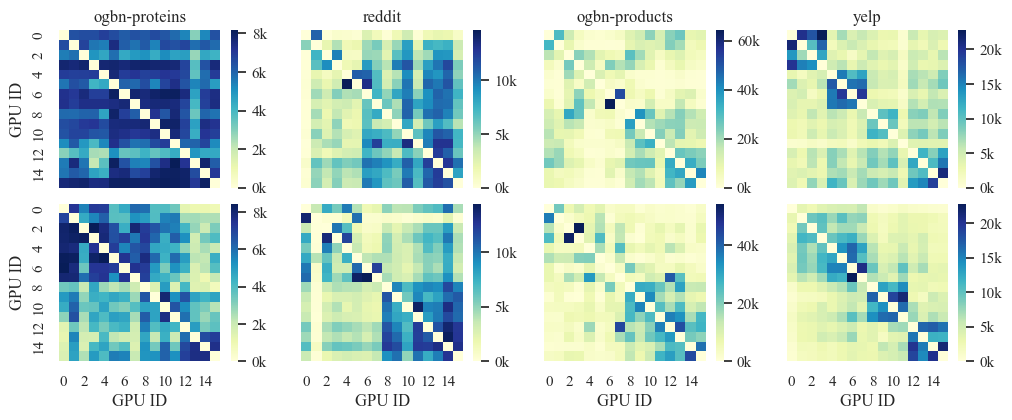

In [6]:
datasets = ['ogbn-proteins', "reddit", "ogbn-products", "yelp"]

plt_index = 1

plt.figure(figsize=(12, 4.3))
plt.subplots_adjust(right=None, left=None,wspace=0.2, hspace=0.1)

for dataset in datasets:
    # dataset = "yelp"
    gpus = 8
    nodes = 2

    bns_name = dataset + '-' + str(gpus*nodes) + '-metis-cut-trans'
    rcgnn_name = dataset + '-' + str(gpus*nodes) + '-metis-cut-trans' + ((f'-{gpus}') * nodes)

    print(bns_name)
    print(rcgnn_name)

    df_bns_plot = df_bns_2[df_bns_2['dataset'] == bns_name]
    # 按照rank升序
    df_bns_plot = df_bns_plot.sort_values(by='rank', ascending=True)

    # 创建一个新的空DataFrame来存储拆分后的数据
    df_bns_expanded = pd.DataFrame()

    # 遍历df_bns_plot中的每一行
    for index, row in df_bns_plot.iterrows():
        # 获取raw_data列的内容
        raw_data_content = row['raw_data']
        # print(row['rank'])
        raw_data_content = raw_data_content + '(' + str(row['rank']) + ' 0)'
        # 使用正则表达式分割raw_data_content中的每一对数字
        parts = re.findall(r'\((\d+)\s(\d+)\)', raw_data_content)
        # 对 parts 按照第一个元素的值排序
        parts_sorted = sorted(parts, key=lambda x: int(x[0]))
        # 在第index的位置插入0
        df_parts_sorted = pd.DataFrame([pd.to_numeric(x[1]) for x in parts_sorted], columns=['Column2'])
        df_bns_expanded = pd.concat([df_bns_expanded, df_parts_sorted], axis=1)

    # print(df_bns_expanded)

    df_rcgnn_plot = df_rcgnn_2[df_rcgnn_2['dataset'] == rcgnn_name]
    # 按照rank升序
    df_rcgnn_plot = df_rcgnn_plot.sort_values(by='rank', ascending=True)

    # print(df_rcgnn_plot)

    # 创建一个新的空DataFrame来存储拆分后的数据
    df_rcgnn_expanded = pd.DataFrame()

    # 遍历df_rcgnn_plot中的每一行
    for index, row in df_rcgnn_plot.iterrows():
        # 获取raw_data列的内容
        raw_data_content = row['raw_data']
        # print(row['rank'])
        raw_data_content = raw_data_content + '(' + str(row['rank']) + ' 0)'
        # 使用正则表达式分割raw_data_content中的每一对数字
        parts = re.findall(r'\((\d+)\s(\d+)\)', raw_data_content)
        # 对 parts 按照第一个元素的值排序
        parts_sorted = sorted(parts, key=lambda x: int(x[0]))
        # 在第index的位置插入0
        df_parts_sorted = pd.DataFrame([pd.to_numeric(x[1]) for x in parts_sorted], columns=['Column2'])
        df_rcgnn_expanded = pd.concat([df_rcgnn_expanded, df_parts_sorted], axis=1)

    # print(df_rcgnn_expanded)
    df_bns_expanded.columns = range(df_bns_expanded.shape[1])
    df_rcgnn_expanded.columns = range(df_rcgnn_expanded.shape[1])

    # 数值除以1000
    df_bns_expanded = df_bns_expanded / 1000
    df_rcgnn_expanded = df_rcgnn_expanded / 1000

    plt.subplot(2, 4, plt_index)

    sns.heatmap(df_bns_expanded, cmap='YlGnBu', cbar_kws={'format': formatter})
    # plt.xlabel('GPU ID')
    # plt.ylabel('GPU ID')

    ax = plt.gca()
    if plt_index != 1:
        ax.set_yticks([])
    else:
        plt.ylabel('GPU ID')
    ax.set_xticks([])

    plt.title(dataset)

    plt.subplot(2, 4, plt_index+4)

    sns.heatmap(df_rcgnn_expanded, cmap='YlGnBu', cbar_kws={'format': formatter})
    # plt.xlabel('GPU ID')
    # plt.ylabel('GPU ID')

    ax = plt.gca()
    if plt_index != 1:
        ax.set_yticks([])
    else:
        plt.ylabel('GPU ID')
    plt.xlabel('GPU ID')


    plt_index += 1

plt.savefig("com-comp-our.pdf", dpi=400, format="pdf",
            bbox_inches='tight', pad_inches=0.0)
